========== TESTING MODEL: MLP ===========


Ticker: PNC
23 buy/sells performed - 0.40421792618629176% of the time
Stock price change: -8.856994091918114%
Total gain/loss: -0.5784985351562499%
{'cash': 6304.450012207031, 'assets': 22, 'latest_price': 165.35000610351562, 'total_value': 9942.150146484375}


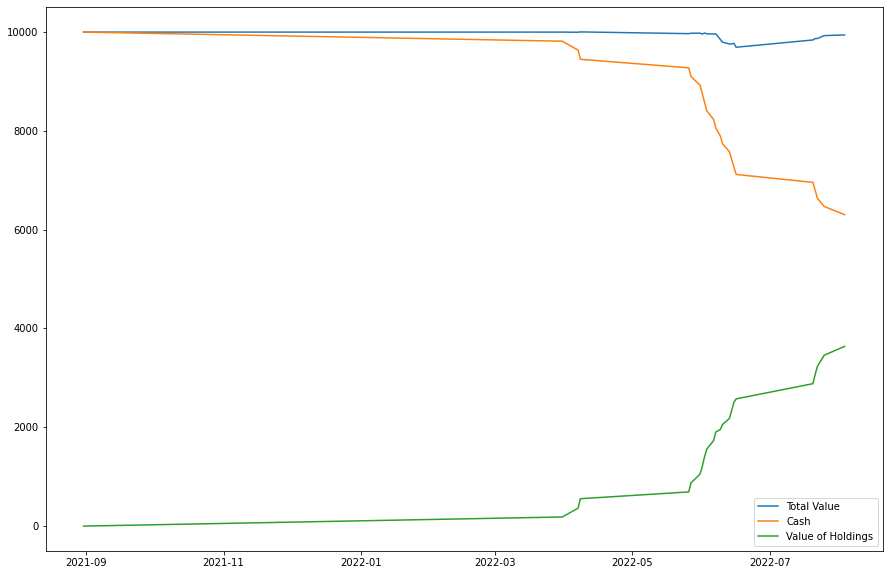

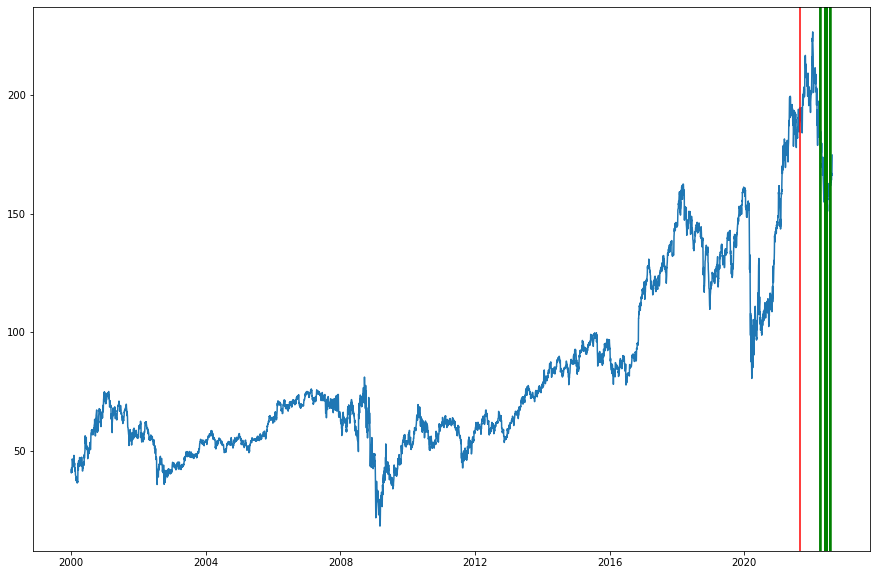

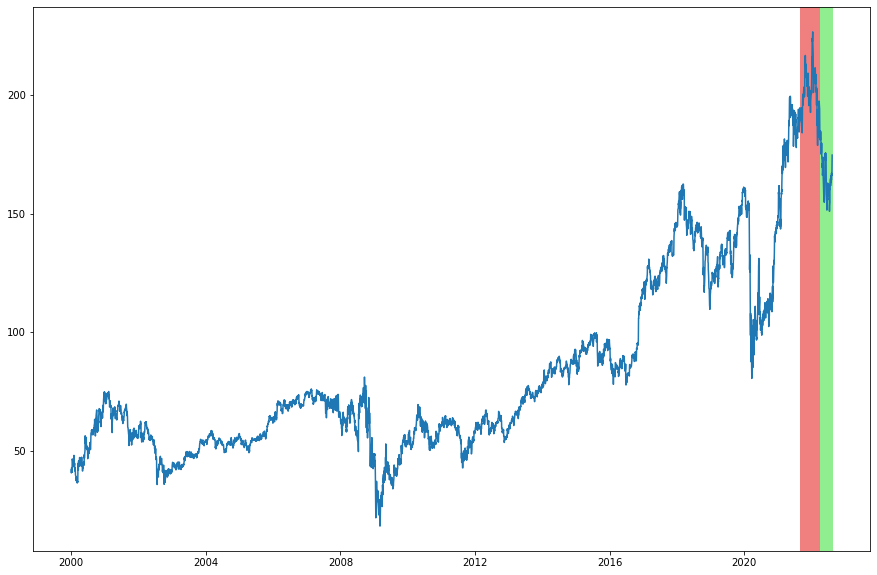

Ticker: TSCO
62 buy/sells performed - 1.0896309314586996% of the time
Stock price change: 7.348049033406228%
Total gain/loss: -0.7721026611328125%
{'cash': 567.5900268554688, 'assets': 48, 'latest_price': 194.89999389648438, 'total_value': 9922.789733886719}


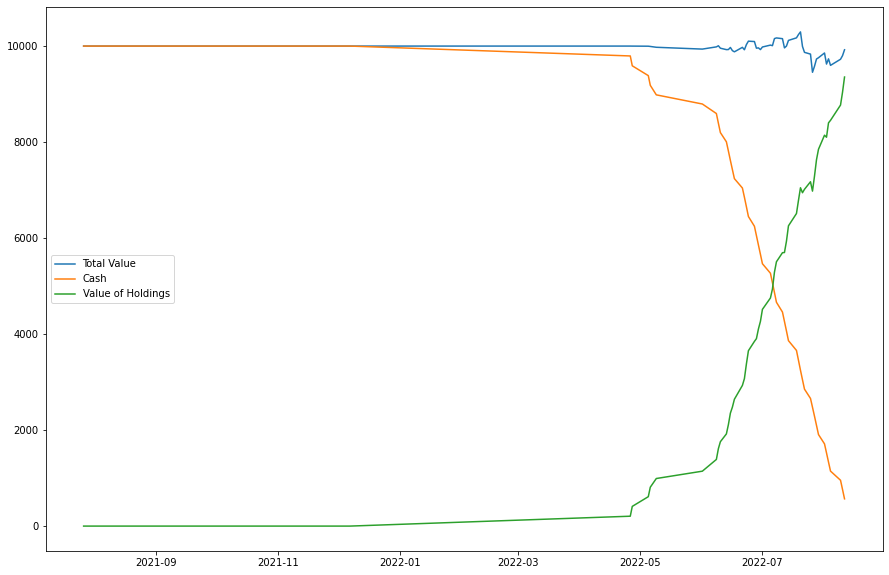

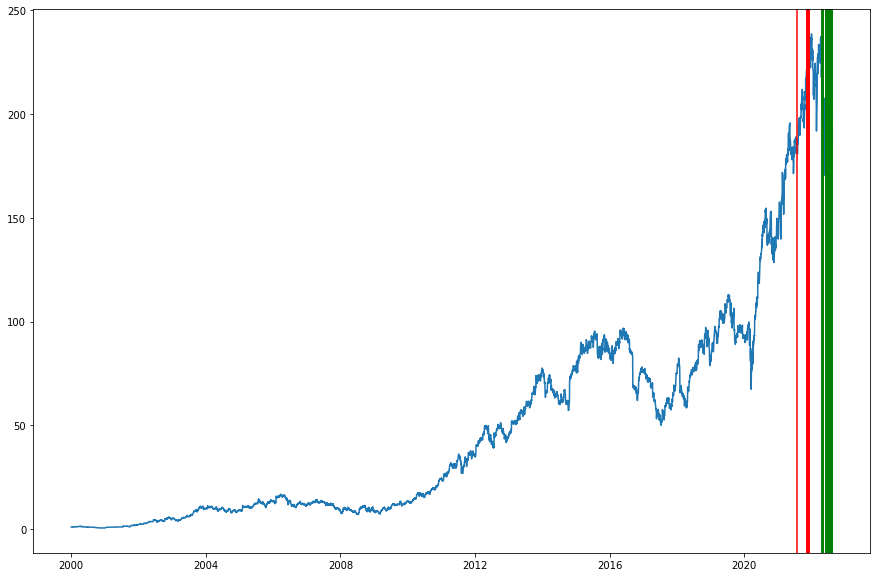

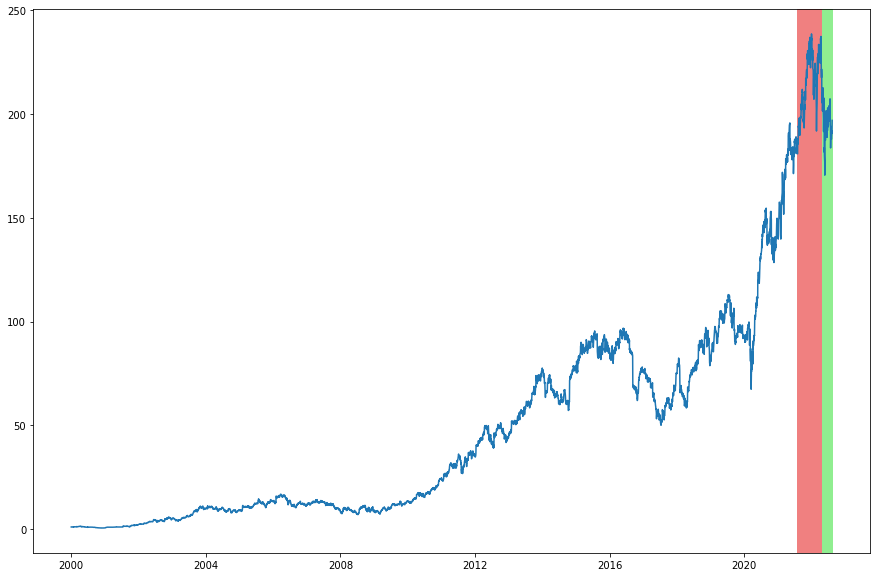

{'average_gainloss': -67.53005981445312, 'results': {'PNC': {'cash': 6304.450012207031, 'assets': 22, 'latest_price': 165.35000610351562, 'total_value': 9942.150146484375}, 'TSCO': {'cash': 567.5900268554688, 'assets': 48, 'latest_price': 194.89999389648438, 'total_value': 9922.789733886719}}}
========== TESTING MODEL: Random Forest ===========


Ticker: PNC
feature importance:
pchange_-480day: 0.03855860611488006
pchange_-1920day: 0.03178245314326462
donchian40_wband: 0.031285341148195984
pchange_-240day: 0.030226255491021
ulcer40: 0.029912834478033043
donchian20_wband: 0.027759904950420213
ulcer120: 0.02771764861073955
pchange_-960day: 0.026589400114019775
kama240: 0.026041858440461127
ulcer80: 0.025735170448405658
pchange_-60day: 0.02424707062168767
avg_true_range: 0.024223203640436845
avg_true_range120: 0.023792973347706244
avg_true_range60: 0.023672243083475247
kst_sig: 0.021939555080332736
bollinger_wband: 0.02186764275502495
pchange_-120day: 0.021578235878991544
ema120: 0.020734

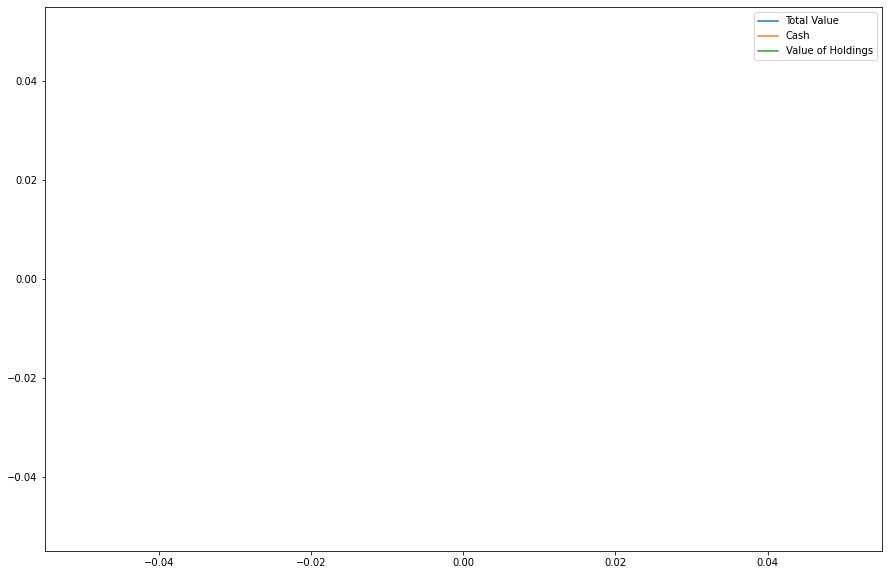

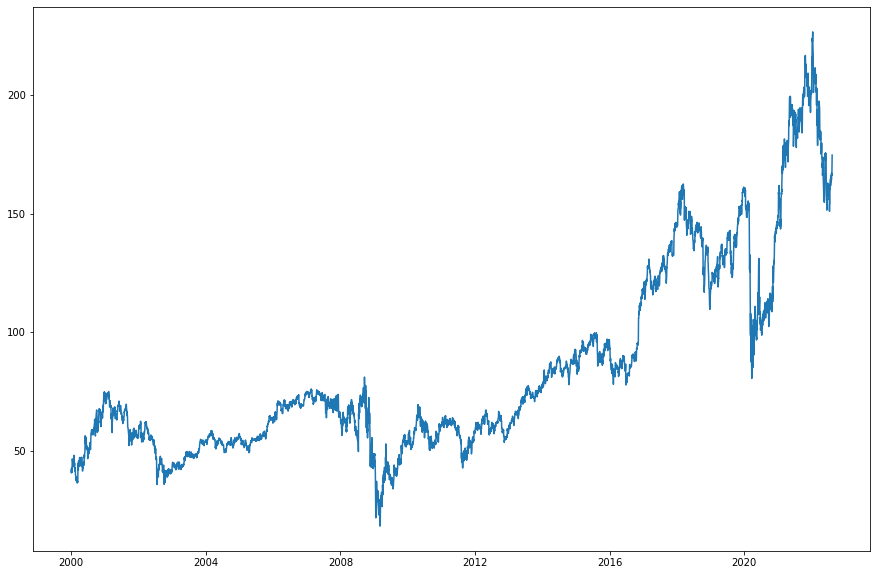

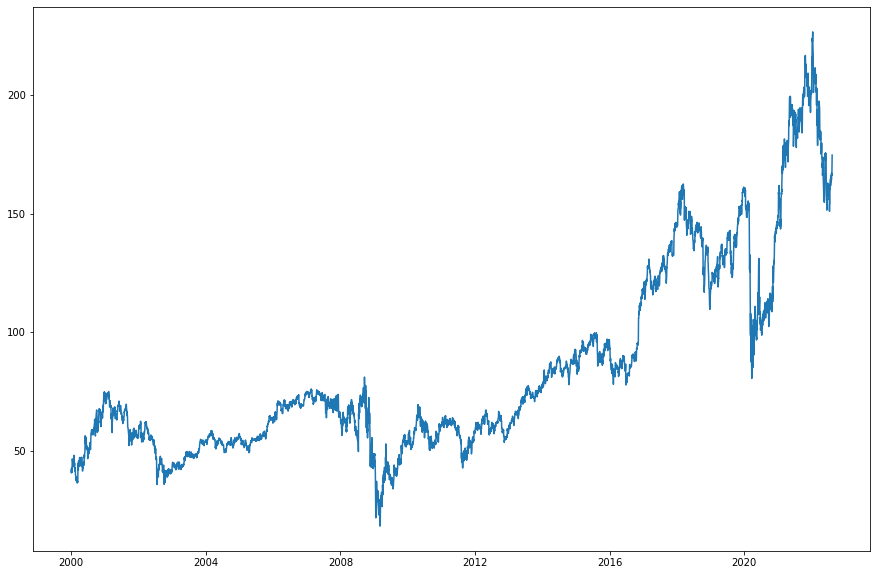

Ticker: TSCO
feature importance:
pchange_-1920day: 0.05984295765788066
donchian40_wband: 0.04592539850911624
kama: 0.04434816427636634
ulcer120: 0.035791530464855885
pchange_-480day: 0.03190828629844254
pchange_-240day: 0.030150235880363113
pchange_-960day: 0.029049969677321735
ulcer40: 0.02767218537300663
pchange_-60day: 0.026918375633000164
avg_true_range: 0.025970062294588946
ulcer80: 0.025821110395477
pchange_-120day: 0.023791827237700455
kst_sig: 0.021770121233425376
avg_true_range60: 0.021650493136197504
rsi120: 0.020009641840368745
avg_true_range120: 0.01969390493742735
donchian20_wband: 0.01968251855211445
kama240: 0.0194173086220284
ema120: 0.017735051473351453
rsi240: 0.017691054623784966
ulcer14: 0.017046939993433305
macd_signal: 0.01680430050969066
kst_diff: 0.016417008240680417
bollinger_wband: 0.015372766965499423
adx: 0.015323695426090722
adx30: 0.01501318638574893
macd_diff: 0.014705132280539828
kst: 0.014334103938299134
pchange_-30day: 0.013997449018977171
close: 0.013

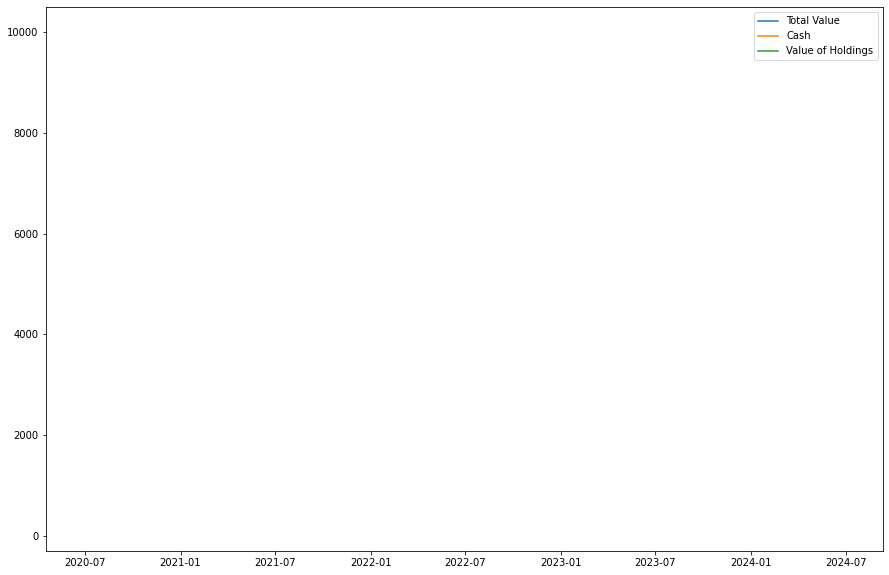

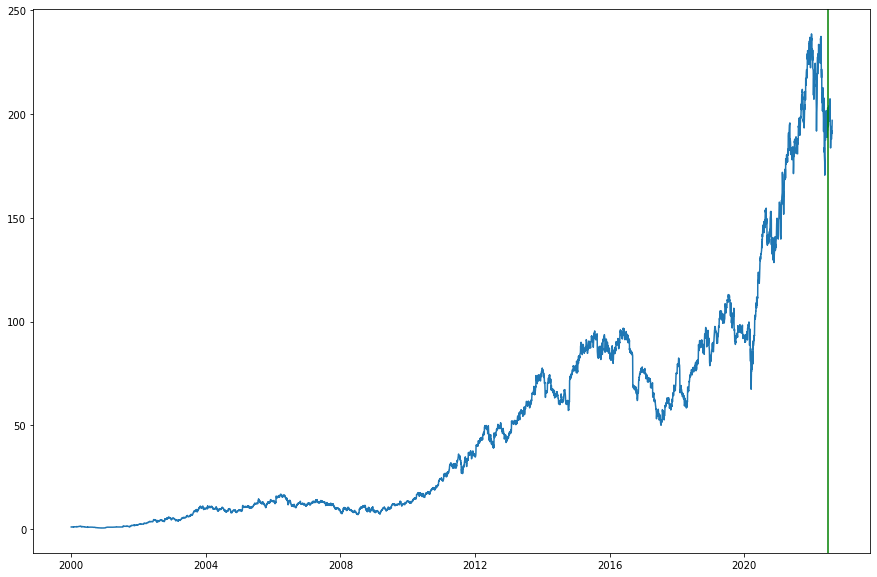

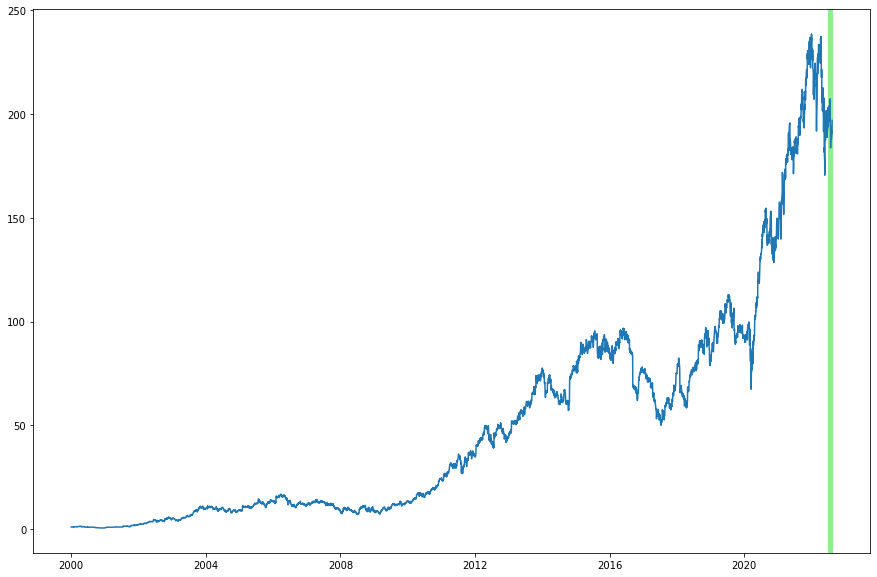

TypeError: 'NoneType' object is not subscriptable

In [1]:
# Auto reload local files
%load_ext autoreload
%reload_ext autoreload
%autoreload 2
# Make files in src/ available to notebook
import sys
if 'src' not in sys.path:
    sys.path.insert(0, 'src')

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV

from technical_signals import TechnicalSignals, percent_change
import datastore as ds
import backtest as bt
from strategy import TechnicalIndicatorsModelStrategy, DummyStrategy

# XXX NOTE VERY IMPORTANT
# THIS FILTERS ALL WARNINGS - ta library is giving annoying warnings.
# REMOVE AND RESTART before modifying any bt code
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 10]

spy_constituents = list(pd.read_csv('../../data/spy_constituents.csv', header=0)['Symbol'])
random.shuffle(spy_constituents)

tickers = spy_constituents[:2]

strategies = [
    #('Grid search SVR', TechnicalIndicatorsModelStrategy(svr_grid, window=7, cutoff=0.5, bias=0.1)),
    ('MLP', TechnicalIndicatorsModelStrategy(MLPRegressor(), window=14, cutoff=2, bias=0.1)),
    ('Random Forest', TechnicalIndicatorsModelStrategy(RandomForestRegressor(n_jobs=-1, criterion='absolute_error'), window=14, cutoff=1.5, bias=0.4)),
    ('SGD', TechnicalIndicatorsModelStrategy(SGDRegressor(), window=14, cutoff=2, bias=0.1)),
    ('SVR', TechnicalIndicatorsModelStrategy(SVR(), window=14, cutoff=2, bias=0.1)),
]

"""
for name, strategy in strategies:
    print(f"========== TESTING MODEL: {name} ===========\n\n")
    bt_summary = bt.comprehensive_backtest(strategy, tickers, plot=True, skip_index=252*15, processes=8)
    print(bt_summary)
"""

for name, strategy in strategies:
    print(f"========== TESTING MODEL: {name} ===========\n\n")
    bt_summary = bt.comprehensive_backtest(strategy, tickers, "2000-01-01", "2023-06-06", plot=True, train_test_ratio=0.95, processes=8)
    print(bt_summary)
#strategy = DummyStrategy()
#dummy_summary = bt.comprehensive_backtest(strategy, tickers, plot=True, skip_index=252*15, processes=8)
#print(dummy_summary)

In [3]:
ds.get_daily_candlesticks(['AUD/USD'], '1990-01-01', '2030-01-01')

{'AUD/USD': Empty DataFrame
 Columns: []
 Index: []}

In [15]:
financials = ds.get_financials_reported(["wasabi"])

In [18]:
financials["wasabi"].head().iloc[0].data

[{'accessNumber': '0000320193-22-000070',
  'symbol': 'AAPL',
  'cik': '320193',
  'year': 2022,
  'quarter': 3,
  'form': '10-Q',
  'startDate': '2021-09-26 00:00:00',
  'endDate': '2022-06-25 00:00:00',
  'filedDate': '2022-07-29 00:00:00',
  'acceptedDate': '2022-07-28 18:06:56',
  'report': {'bs': [{'concept': 'us-gaap_CashAndCashEquivalentsAtCarryingValue',
     'unit': 'usd',
     'label': 'Cash and cash equivalents',
     'value': 27502000000.0},
    {'concept': 'us-gaap_MarketableSecuritiesCurrent',
     'unit': 'usd',
     'label': 'Marketable securities',
     'value': 20729000000.0},
    {'concept': 'us-gaap_AccountsReceivableNetCurrent',
     'unit': 'usd',
     'label': 'Accounts receivable, net',
     'value': 21803000000.0},
    {'concept': 'us-gaap_InventoryNet',
     'unit': 'usd',
     'label': 'Inventories',
     'value': 5433000000.0},
    {'concept': 'us-gaap_NontradeReceivablesCurrent',
     'unit': 'usd',
     'label': 'Vendor non-trade receivables',
     'value'